
This is the lstm model for forecasting kospi volatility

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import data_reader as dr


In [2]:
data, source = dr.read('kospi_extended.csv')

Loading data from file /home/changhyun/workspace/cxk858/dataset/kospi_extended.csv...



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 0 to 2461
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2456 non-null   object 
 1   Open                 2456 non-null   float64
 2   High                 2456 non-null   float64
 3   Low                  2456 non-null   float64
 4   Close                2456 non-null   float64
 5   Adj Close            2456 non-null   float64
 6   Volume               2456 non-null   float64
 7   Daily_trading_range  2456 non-null   float64
 8   Log_Volume_change    2455 non-null   float64
 9   Daily_return         2455 non-null   float64
 10  Daily_log_return     2455 non-null   float64
 11  Target               2434 non-null   float64
dtypes: float64(11), object(1)
memory usage: 249.4+ KB


In [4]:
data = data.drop(['Date', 'Adj Close', 'Open', 'High', 'Close', 'Volume', 'Low','Daily_return'], axis=1)

In [5]:
x_values = data.iloc[22:, :-1]
y_values = data[['Target']]
y_values = y_values.iloc[22:]

In [6]:
x_values.info()
y_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2434 entries, 22 to 2461
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Daily_trading_range  2434 non-null   float64
 1   Log_Volume_change    2434 non-null   float64
 2   Daily_log_return     2434 non-null   float64
dtypes: float64(3)
memory usage: 76.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2434 entries, 22 to 2461
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  2434 non-null   float64
dtypes: float64(1)
memory usage: 38.0 KB


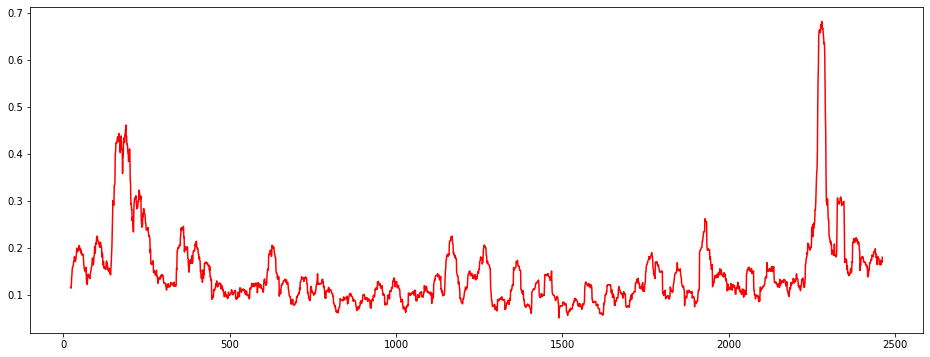

In [7]:
plt.figure(1, figsize=(16,6))
plt.plot(data['Target'], color='red')

In [8]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x_values)
scaled_y = scaler.fit_transform(y_values)

In [9]:

y_values

,Target
22,0.115390
23,0.114448
24,0.121056
25,0.135732
26,0.145106
...,...
2457,0.164065
2458,0.172634
2459,0.171360
2460,0.169037


In [10]:
split = int(len(x_values)*0.8)

In [11]:
window = 22
trainX = scaled_x[:split]
testX = scaled_x[split:]
trainY = scaled_y[:split]
testY = scaled_y[split:]


In [12]:
Xtrain = []
ytrain = []
Xtest = []
ytest = []

for i in range(window, len(trainX)):
    Xtrain.append(trainX[i-window:i, :trainX.shape[1]])
    ytrain.append(trainY[i])
for i in range(window, len(testX)):
    Xtest.append(testX[i-window:i, :testX.shape[1]])
    ytest.append(testY[i])

In [13]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [14]:

print(Xtrain.shape)
print(ytrain.shape)
print("-----")
print(Xtest.shape)
print(ytest.shape)

(1925, 22, 3)
(1925, 1)
-----
(465, 22, 3)
(465, 1)


In [15]:
print(Xtrain)

[[[ 0.34409892 -0.07327947  0.43244298]
  [ 0.31550921  0.20316737 -0.56518359]
  [ 1.37599082  0.43232662 -1.1291379 ]
  ...
  [ 0.43434837 -1.12314214 -1.17951262]
  [ 0.82619446  0.72873202  0.75594678]
  [ 0.27339582  0.14065757  0.23256677]]

 [[ 0.31550921  0.20316737 -0.56518359]
  [ 1.37599082  0.43232662 -1.1291379 ]
  [ 0.98112419 -0.30662419 -1.7548986 ]
  ...
  [ 0.82619446  0.72873202  0.75594678]
  [ 0.27339582  0.14065757  0.23256677]
  [ 0.4411148  -0.37633745 -0.96392022]]

 [[ 1.37599082  0.43232662 -1.1291379 ]
  [ 0.98112419 -0.30662419 -1.7548986 ]
  [ 1.83703429  0.09774818 -1.50904523]
  ...
  [ 0.27339582  0.14065757  0.23256677]
  [ 0.4411148  -0.37633745 -0.96392022]
  [-0.01090373 -0.32140088 -1.27253852]]

 ...

 [[ 0.11393064  0.0867809   1.56679001]
  [ 0.14779023  0.62677938 -0.80133411]
  [-0.0304685  -0.12595998 -0.60194935]
  ...
  [ 2.07995496 -0.32617982 -1.4722111 ]
  [ 0.1161984   1.13057014 -0.78822821]
  [ 0.41403999 -0.19205538  0.77448462]]

 [

In [16]:
print(ytrain)

[[ 0.60009561]
 [ 0.65140747]
 [ 0.62483978]
 ...
 [-0.02156388]
 [-0.03876318]
 [ 0.12057938]]


In [17]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from tensorflow import keras

In [37]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=False, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
# model.add(Dropout(0.5))
# model.add(LSTM(units=32, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(Xtrain, ytrain, batch_size=16, epochs=50, validation_split=0.2, shuffle=False)

Epoch 1/50
97/97 [==============================] - 4s 16ms/step - loss: 0.8969 - val_loss: 0.1483

In [38]:
# previous_model = keras.models.load_model('models/multi_layer_lstm_model')

In [39]:
forecast = model.predict(Xtest)

In [40]:
rev_forecast = scaler.inverse_transform(forecast)
rev_ytest = scaler.inverse_transform(ytest)

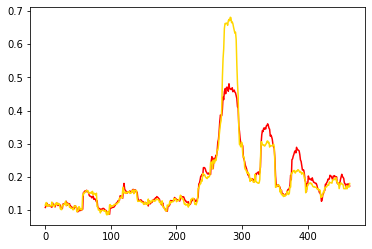

In [41]:
plt.plot(rev_forecast, color='red')
plt.plot(rev_ytest, color='gold')
# plt.savefig("images/single_layer_model_pred.png")

plt.show()

In [42]:
testScore = mean_squared_error(rev_ytest, rev_forecast)
print("test Score: {score} MSE".format(score=testScore))
root_testScore = mean_squared_error(rev_ytest, rev_forecast, squared=False)
print("test Score: {score} RMSE".format(score=root_testScore))
mape = mean_absolute_percentage_error(rev_ytest, rev_forecast)
print("test Score: {score} MAPE".format(score=mape))

test Score: 0.0019982095467761776 MSE
test Score: 0.04470133719226056 RMSE
test Score: 0.07549400191610782 MAPE


In [275]:
# model.save("models/single_layer_lstm_model")

INFO:tensorflow:Assets written to: models/single_layer_lstm_model/assets


INFO:tensorflow:Assets written to: models/single_layer_lstm_model/assets


## Experiment settings

Dataset: KOSPI index from Jan, 2011 to Dec, 2020\
Included data in default: Daily log return, Daily trading range, Log volume change\
Additional data for hybrid: Next prediction by GARCH and GJR-GARCH

- Loss function: mean_squared_error
- Optimizer: Adam
- epochs: 20
- batch_size: 16

## Experiment results


- Single-layer lstm model (32 units)
    * Training error: 0.0042, Validation error: 0.0031
    * MSE: 0.0032
    * RMSE: 0.0568
    * MAPE 0.1912

![title](images/single_layer_model_pred.png)

- Multi-layer lstm model (32 units, dropout 0.3, 32 units)
    * Training error: 0.0045, Validation error: 0.0024
    * MSE: 0.0023
    * RMSE 0.0484
    * MAPE: 0.1701
    
![title](images/multi_layer_model_pred.png)

- Single-layer hybrid model (32 units)
    * Training error: 0.0016, Validation error: 0.0001
    * MSE: 0.0007
    * RMSE: 0.0269
    * MAPE: 0.0924

![title](images/single_layer_hybrid_pred.png)

- Multi-layer hybrid model (32 units, dropout 0.3, 32 units)
    * Training error: 0.0024, Validation error: 0.0001
    * MSE: 0.0008
    * RMSE: 0.0274
    * MAPE: 0.0935
    
![title](images/multi_layer_hybrid_pred.png)